In [1]:
# load the basic package
import numpy as np
import pandas as pd

# Merge the Dataset

In [2]:
# Load the datasets
df_ca = pd.read_csv('CAvideos.csv')
df_de = pd.read_csv('DEvideos.csv')
df_fr = pd.read_csv('FRvideos.csv')
df_gb = pd.read_csv('GBvideos.csv')
df_us = pd.read_csv('USvideos.csv')

# Add a new column 'location' to each DataFrame
df_ca['location'] = 'Canada'
df_de['location'] = 'Germany'
df_fr['location'] = 'France'
df_gb['location'] = 'Great Britain'
df_us['location'] = 'USA'

# Concatenate all DataFrames
merged_df = pd.concat([df_ca, df_de, df_fr, df_gb, df_us], ignore_index=True)

# Check the first few rows of the merged DataFrame
print(merged_df.head())

      video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady

In [3]:
# Check the data types of each column
print(merged_df.dtypes)

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
location                  object
dtype: object


In [4]:
# Check for missing values in the merged DataFrame
print("Missing values in new Merged DataFrame:")
print(merged_df.isnull().sum())

Missing values in new Merged DataFrame:
video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               6942
location                     0
dtype: int64


# Exploratory Data Analysis for Numerical Variables

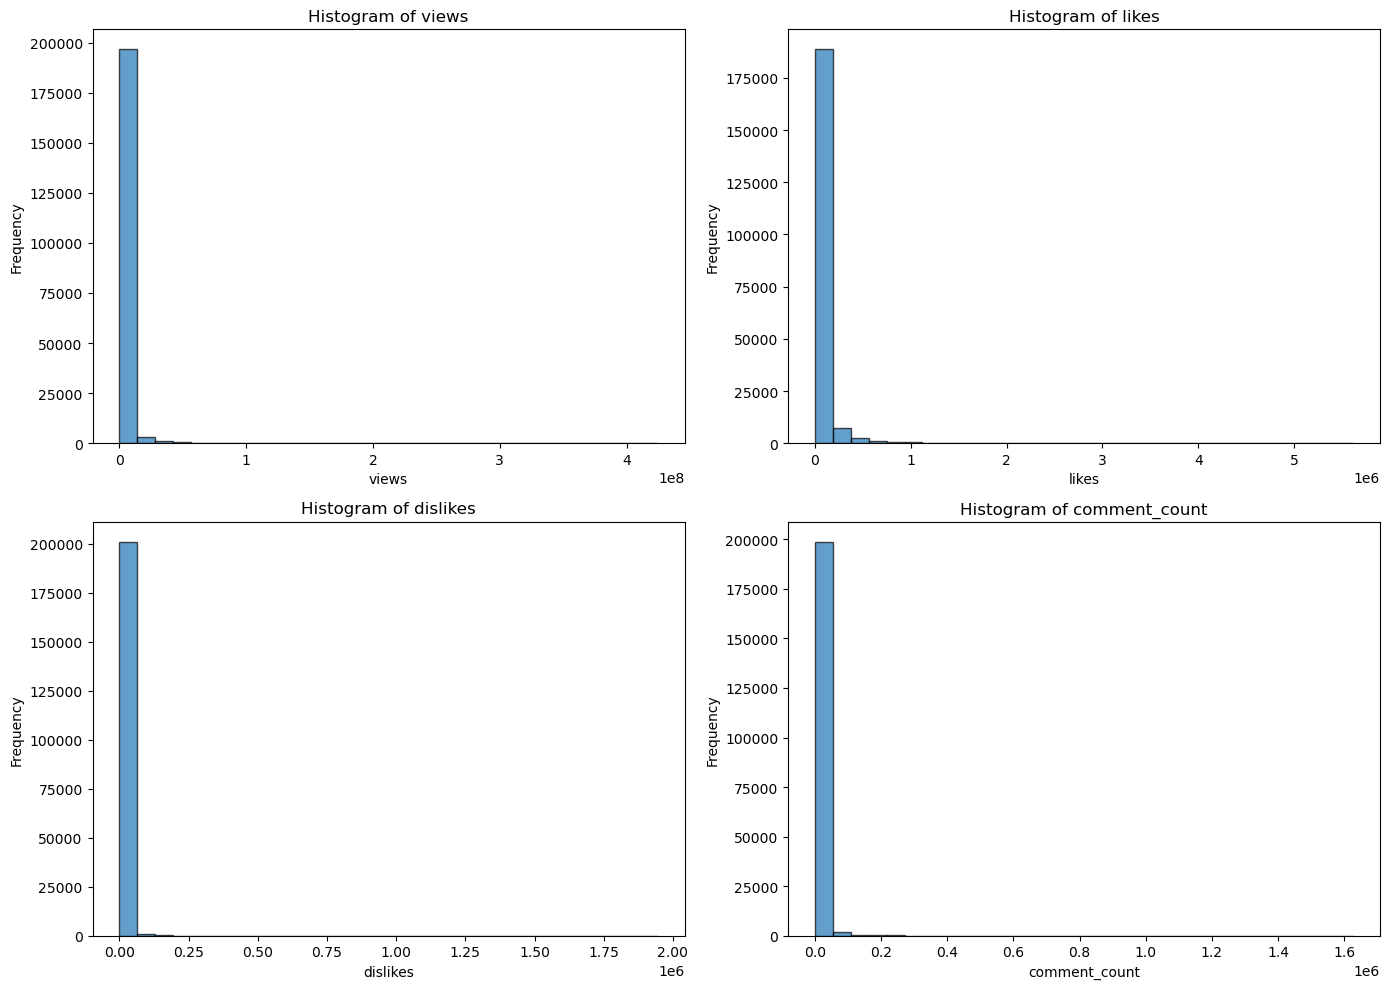

In [5]:
#data exploration for numerical columns
import matplotlib.pyplot as plt

# Define numerical columns
numerical_columns = ['views', 'likes', 'dislikes', 'comment_count']

# Create histograms for each numerical column
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(merged_df[column], bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Exploratory Data Analysis for Boolean Variables

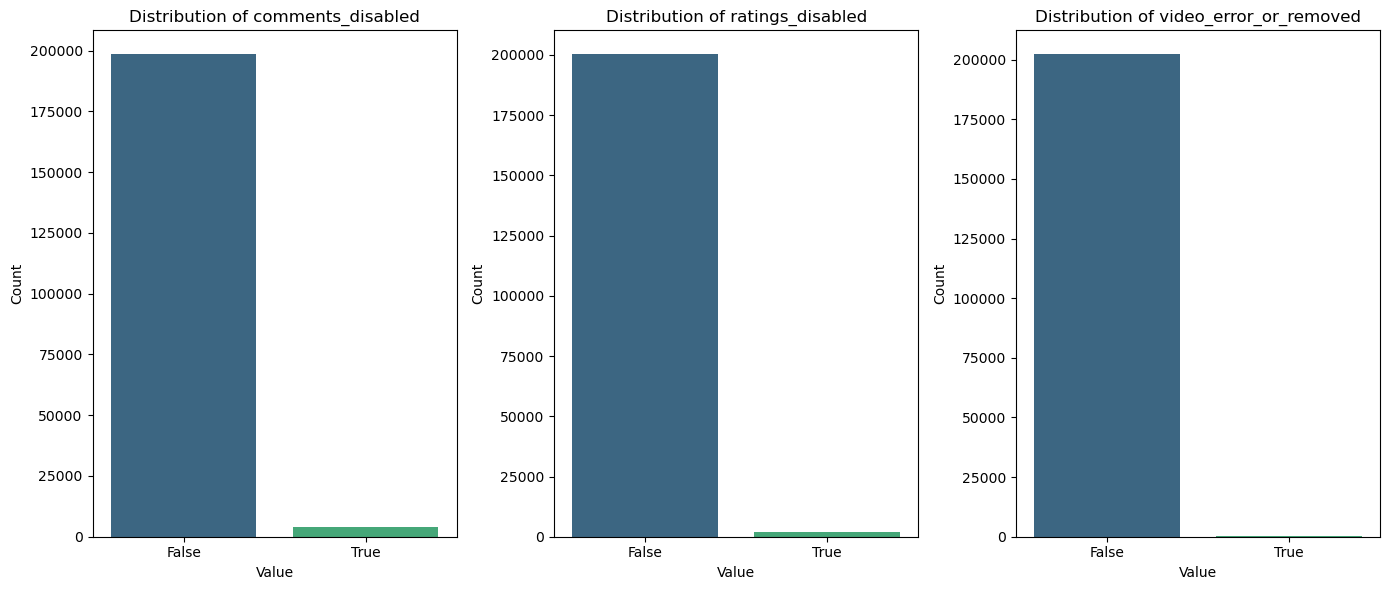

In [6]:
#data exploration for boolean variables
import seaborn as sns

# Define boolean columns
boolean_columns = ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']

# Plot bar plots for each boolean column
plt.figure(figsize=(14, 6))
for i, column in enumerate(boolean_columns, 1):
    plt.subplot(1, 3, i)
    # Count the occurrences of each boolean value
    counts = merged_df[column].value_counts()
    # Plot bar plot
    sns.barplot(x=counts.index, y=counts.values, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Value')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Exploratory Data Analysis for Date-Time Variables

/var/folders/yn/hnpfh1r15tq8t0xq_j4_rzmh0000gn/T/ipykernel_19574/1621989413.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(merged_df['trending_day_of_week'], discrete=True, palette='viridis')


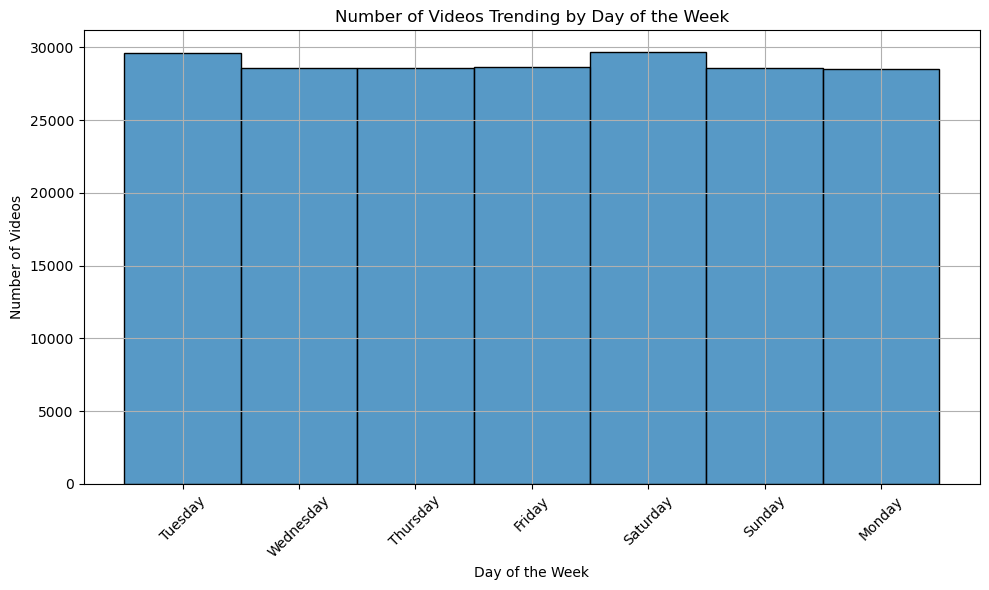

In [7]:
# convert the trending_date to datetime type
merged_df['trending_date'] = pd.to_datetime(merged_df['trending_date'], format='%y.%d.%m')
# Extract day of the week from 'trending_date'
merged_df['trending_day_of_week'] = merged_df['trending_date'].dt.day_name()

# Plot histogram of trending day of the week
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['trending_day_of_week'], discrete=True, palette='viridis')
plt.title('Number of Videos Trending by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

# Statistical Description 

In [8]:
numerical_description = merged_df.describe()
print(numerical_description)

                       trending_date    category_id         views  \
count                         202310  202310.000000  2.023100e+05   
mean   2018-02-26 09:17:22.791755520      19.712412  2.053181e+06   
min              2017-11-14 00:00:00       1.000000  2.230000e+02   
25%              2018-01-03 00:00:00      17.000000  7.517425e+04   
50%              2018-02-25 00:00:00      23.000000  3.091290e+05   
75%              2018-04-23 00:00:00      24.000000  1.103690e+06   
max              2018-06-14 00:00:00      44.000000  4.245389e+08   
std                              NaN       7.359156  9.412473e+06   

              likes      dislikes  comment_count  
count  2.023100e+05  2.023100e+05   2.023100e+05  
mean   5.682284e+04  3.067639e+03   6.177626e+03  
min    0.000000e+00  0.000000e+00   0.000000e+00  
25%    1.447000e+03  6.700000e+01   2.090000e+02  
50%    7.603000e+03  2.900000e+02   9.240000e+02  
75%    3.224475e+04  1.152000e+03   3.520000e+03  
max    5.613827e+06  

In [9]:
# Statistical description of categorical columns
categorical_description = merged_df[['category_id', 'location']].describe()
print(categorical_description)

         category_id
count  202310.000000
mean       19.712412
std         7.359156
min         1.000000
25%        17.000000
50%        23.000000
75%        24.000000
max        44.000000


# Create Correlation and Other Exploratory Data Analysis

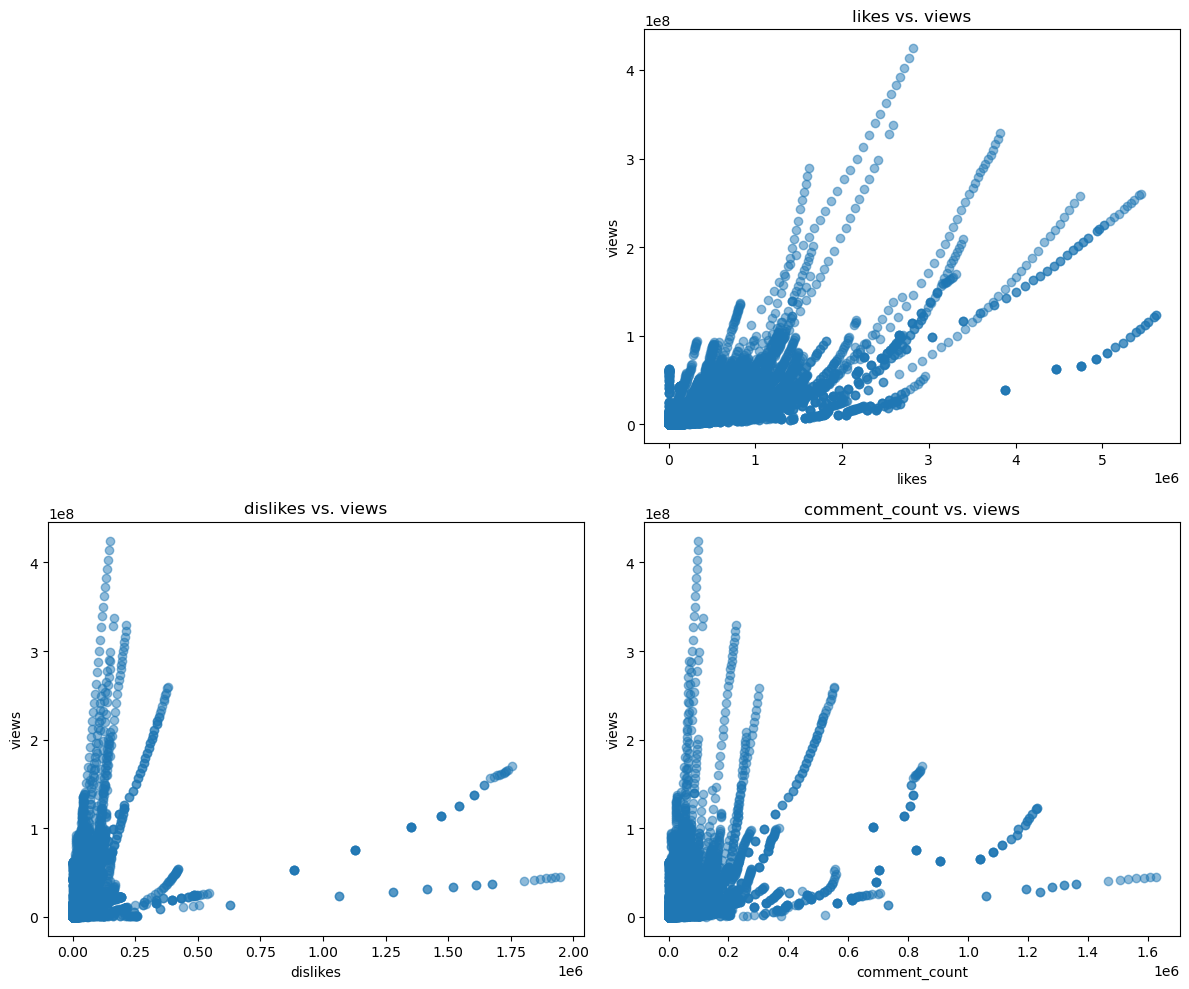

In [10]:
# Scatter plots for each numerical column vs. 'views'
plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_columns, 1):
    if column != 'views':
        plt.subplot(2, 2, i)
        plt.scatter(merged_df[column], merged_df['views'], alpha=0.5)
        plt.title(f'{column} vs. views')
        plt.xlabel(column)
        plt.ylabel('views')

plt.tight_layout()
plt.show()

                  views     likes  dislikes  comment_count  category_id
views          1.000000  0.784467  0.415790       0.501928    -0.153767
likes          0.784467  1.000000  0.454301       0.780923    -0.172141
dislikes       0.415790  0.454301  1.000000       0.727815    -0.035868
comment_count  0.501928  0.780923  0.727815       1.000000    -0.076689
category_id   -0.153767 -0.172141 -0.035868      -0.076689     1.000000


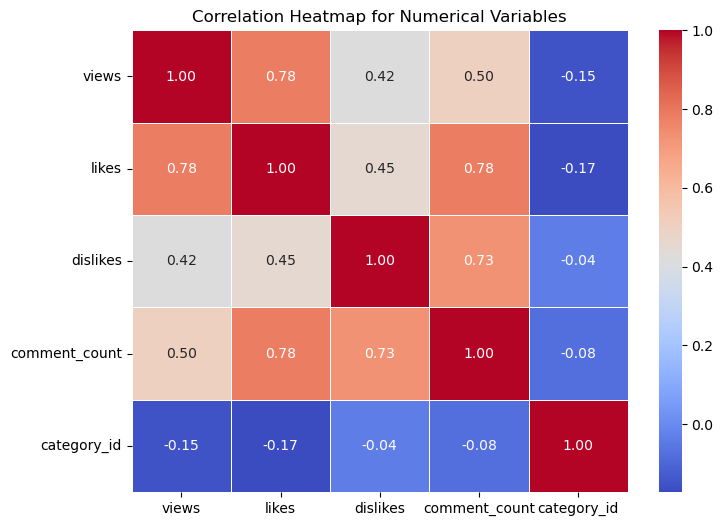

In [11]:
# add category_id to numerical columns
numerical_columns = ['views', 'likes', 'dislikes', 'comment_count', 'category_id']

# Compute the correlation matrix
correlation_matrix = merged_df[numerical_columns].corr()
# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()

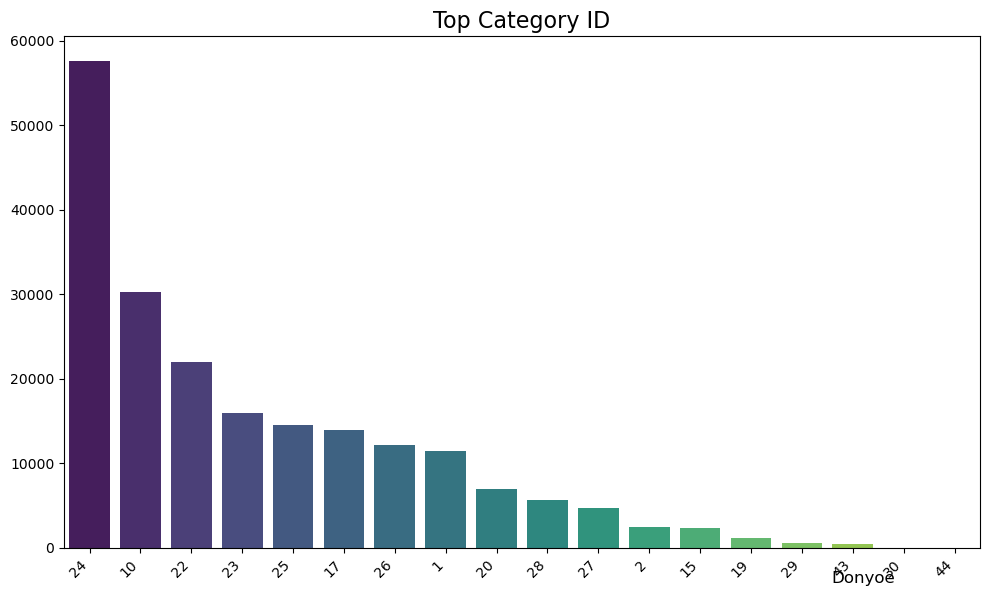

In [12]:
# Group by 'category_id' and count occurrences 
category_counts = merged_df.groupby('category_id').size().reset_index(name='N')

# Sort by 'N' in descending order
category_counts = category_counts.sort_values(by='N', ascending=False)
category_counts['category_id'] = pd.Categorical(category_counts['category_id'], categories=category_counts['category_id'], ordered=True)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=category_counts, x='category_id', y='N', palette='viridis')

# Customize the plot to match your ggplot2 example
plt.title("Top Category ID", fontsize=16)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.figtext(0.9,0.02,"Donyoe", horizontalalignment='right', fontsize=12)
plt.show()

# Metrics Creation

In [13]:
# Create a new column
merged_df['Engagement Metrics'] = merged_df['likes'] + merged_df['dislikes'] + merged_df['comment_count']
# Display the DataFrame to check the new column
print(merged_df[['likes', 'dislikes', 'comment_count', 'Engagement Metrics']].head())

     likes  dislikes  comment_count  Engagement Metrics
0   787425     43420         125882              956727
1   127794      1688          13030              142512
2   146035      5339           8181              159555
3   132239      1989          17518              151746
4  1634130     21082          85067             1740279


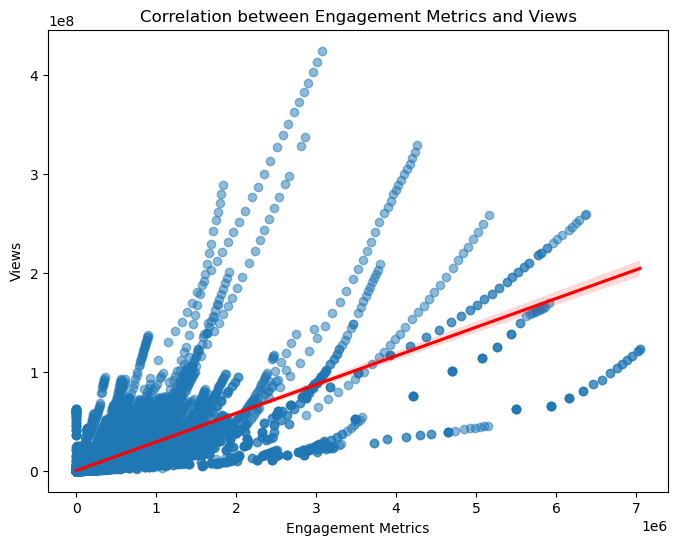

In [14]:
# Create a scatter plot with a regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Engagement Metrics', y='views', data=merged_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Correlation between Engagement Metrics and Views')
plt.xlabel('Engagement Metrics')
plt.ylabel('Views')
plt.show()

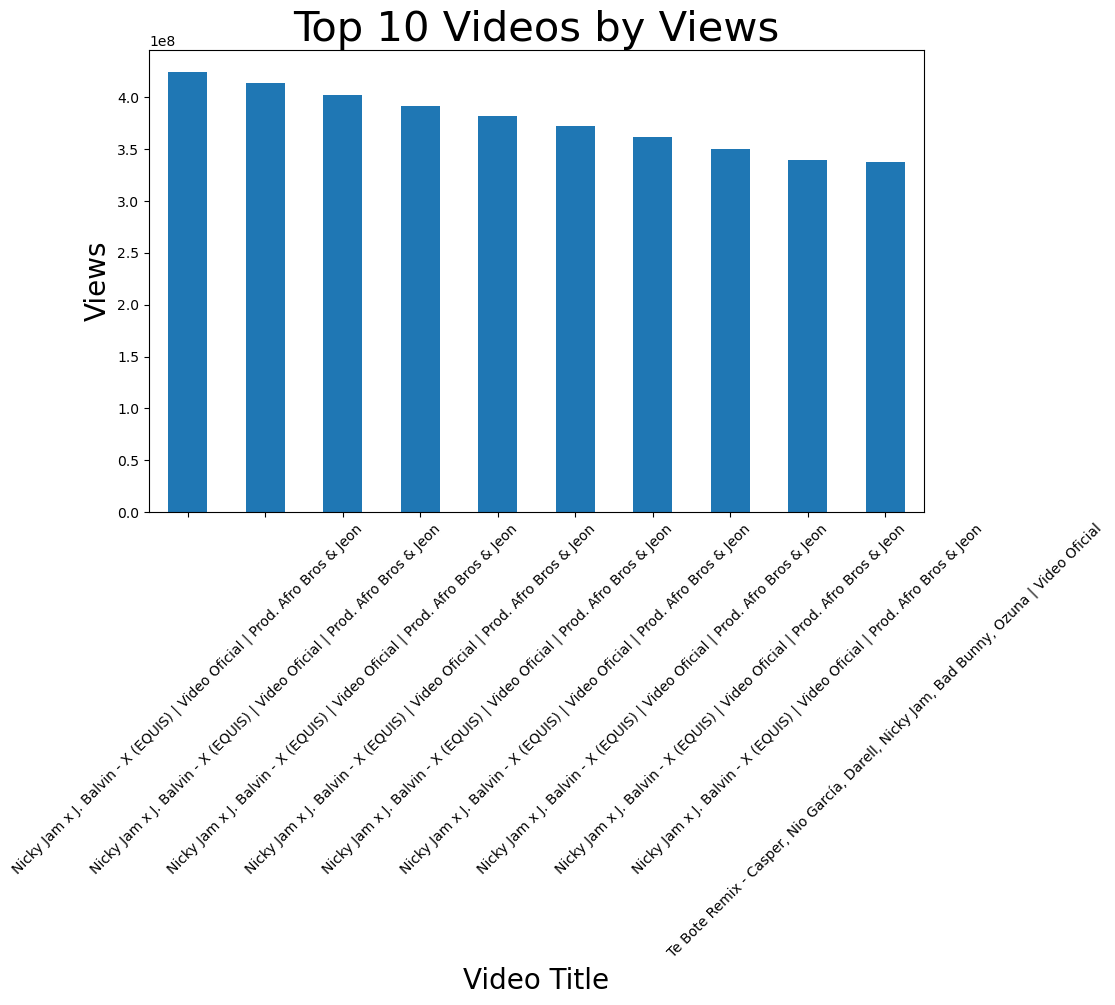

In [15]:
top_videos = merged_df.nlargest(10, 'views')[['title', 'views']]

# To plot the chart

top_videos.set_index('title')['views'].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Video Title',fontsize=20)
plt.ylabel('Views',fontsize=20)
plt.title('Top 10 Videos by Views',fontsize=30)
plt.xticks(rotation=45)
plt.show()

In [16]:
# what about top 50? 
## Display engagement metrics for top 50 videos
top_50_videos = merged_df.nlargest(50, 'views')
print(top_50_videos[['title', 'Engagement Metrics','location']])

                                                    title  Engagement Metrics  \
150857  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             3067426   
150657  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             3011515   
150453  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2956724   
150256  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2902891   
150060  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2845332   
149869  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2786627   
149686  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2723032   
149497  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2650114   
149306  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...             2582218   
156905  Te Bote Remix - Casper, Nio García, Darell, Ni...             2862074   
147990               Bad Bunny - Amorfoda | Video Oficial             4264625   
156737  Te Bote Remix - Casp

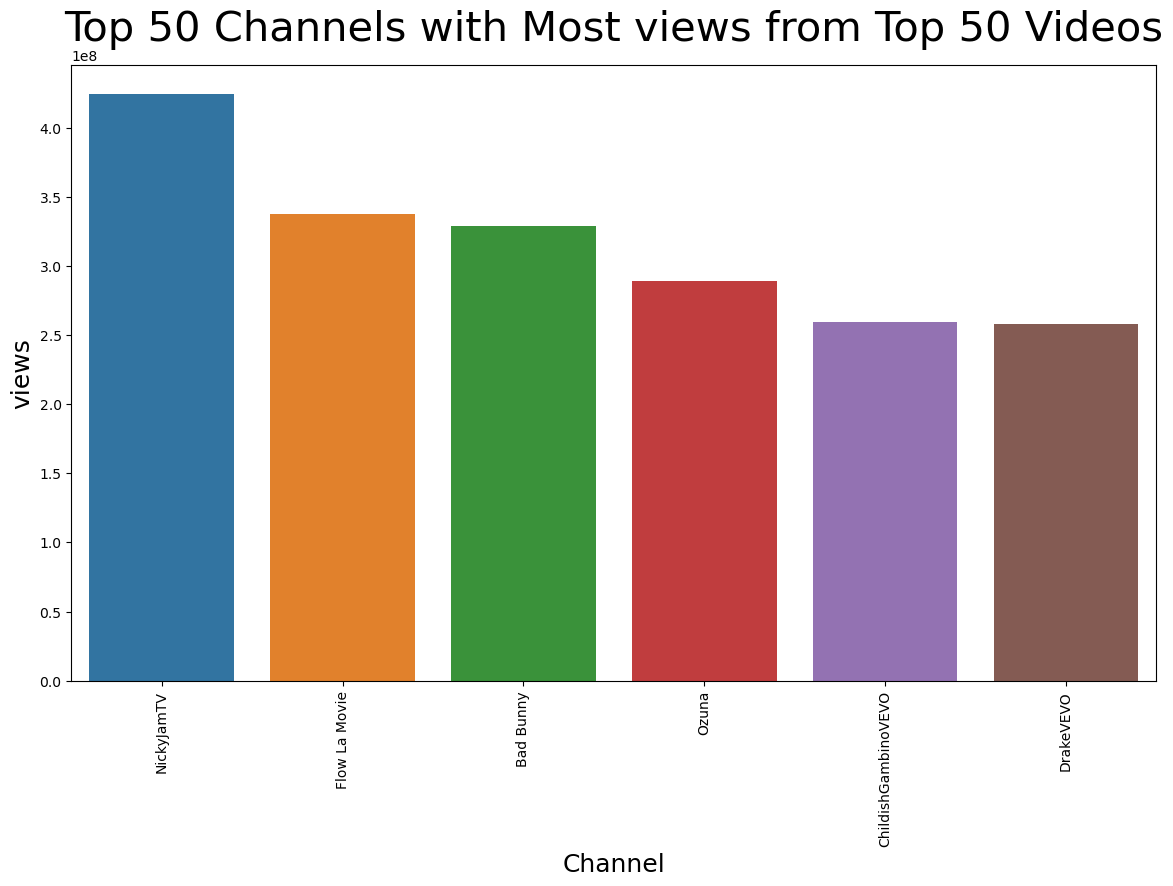

In [17]:
import seaborn as snb
content = top_50_videos.groupby('channel_title')['views'].max()

# Sort values to get the top 50 channels with the most views
content = content.sort_values(ascending=False).head(50)
content = content.reset_index()  # Convert index to column

# Plotting the results
plt.figure(figsize=(14, 8))
snb.barplot(x='channel_title', y='views', data=content)
plt.title('Top 50 Channels with Most views from Top 50 Videos', fontsize=30)
plt.ylabel('views', fontsize=18)
plt.xlabel('Channel', fontsize=18)
plt.xticks(rotation=90)
plt.show()

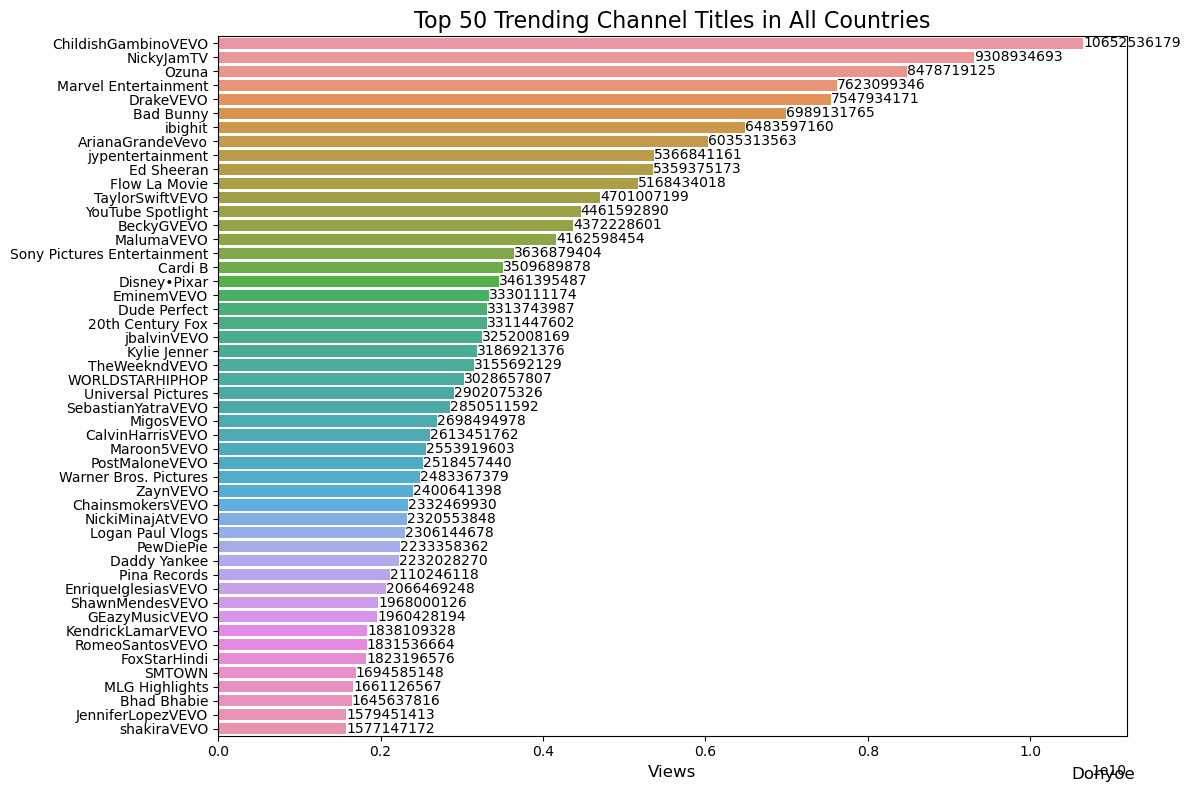

In [18]:
channel_counts = merged_df.groupby('channel_title')['views'].sum().reset_index()

# Sort values and select top 10 channels
top_10_channels = channel_counts.sort_values(by='views', ascending=False).head(50)

# Plot using seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='views', y='channel_title', data=top_10_channels,orient='h')

# Add labels
for index, value in enumerate(top_10_channels['views']):
    ax.text(value, index, str(value), va='center', ha='left', color='black')

# Customize the plot
plt.title('Top 50 Trending Channel Titles in All Countries', fontsize=16)
plt.xlabel('Views', fontsize=12)
plt.ylabel(None)
plt.xticks(rotation=0)  # x-axis ticks don't need rotation in horizontal bar plot
plt.tight_layout()

# Add caption
plt.figtext(0.95, 0.02, "Donyoe", horizontalalignment='right', fontsize=12)

# Show the plot
plt.show()